# GROUP ONE: You'll just need to plot, you won't need to join or do much analysis

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
pd.set_option('max_columns', 60)

###	1. Make a map of power plants in the US, color coded by type

In [3]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."


In [4]:
states.crs

{'init': 'epsg:4269'}

In [5]:
powerplants = pd.read_csv('powerplants.csv')
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300


In [6]:
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [7]:
powerplants.crs = {'init':'epsg:4269'}

In [8]:
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

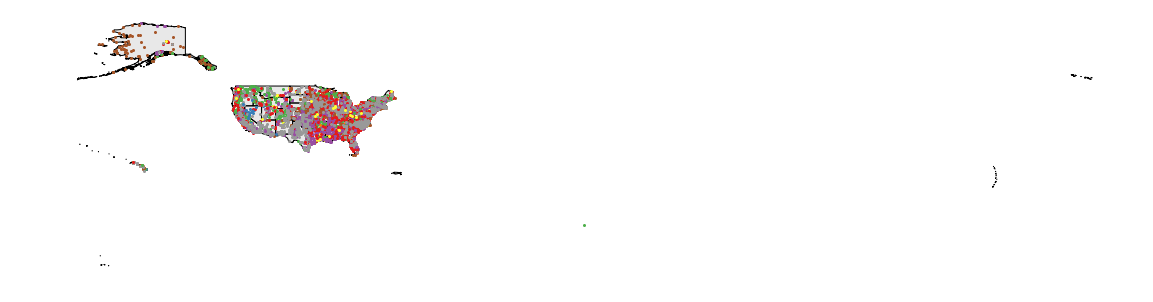

In [9]:
ax = states.plot(color='lightgrey', figsize=(20,20))
powerplants.plot(column='PrimSource', figsize=(20,20), ax=ax)
ax.axis('off')

###	 2. Make a map of air quality stations, color coded by average air quality

In [10]:
stations = pd.read_csv('pm25_annual_fixed.csv')
stations['geometry'] = stations.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
stations = gpd.GeoDataFrame(stations)
stations.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)


In [11]:
states

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41..."
7,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999..."
8,0400000US11,158364992,18633403,11,00,District of Columbia,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000..."
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27..."


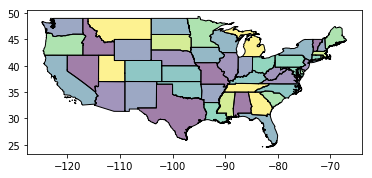

In [12]:
continental_bounds = [
            [
              -128.671875,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              50.28933925329178
            ],
            [
              -128.671875,
              50.28933925329178
            ],
            [
              -128.671875,
              22.268764039073968
            ]
        ]

continental_box = Polygon(continental_bounds)
continental_states = states[states.within(continental_box)]
continental_states.plot()

In [13]:
continental_states.crs

{'init': 'epsg:4269'}

In [14]:
stations.crs = {'init': 'epsg:4269'}
stations.crs

{'init': 'epsg:4269'}

(-163.98705724999999,
 -62.329077749999996,
 17.922097100000002,
 50.882560900000001)

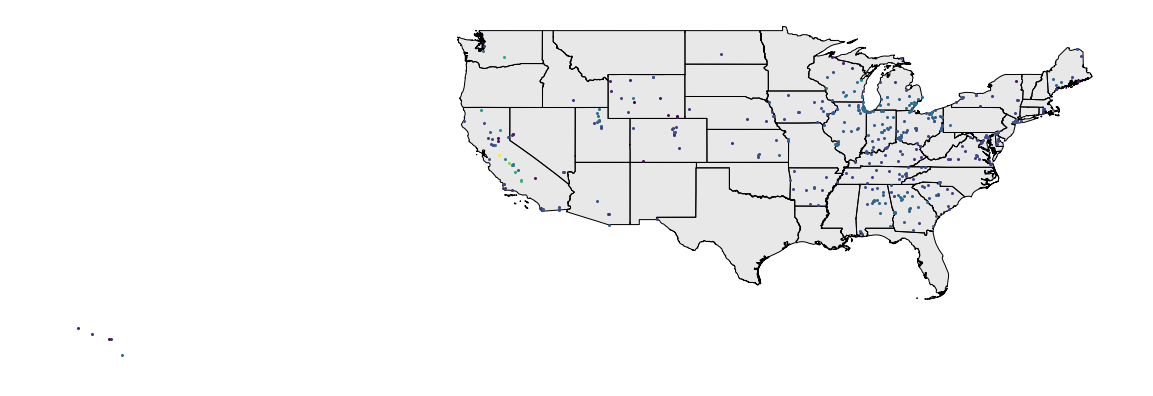

In [15]:
ax = continental_states.plot(color='lightgrey', figsize=(20,20))
stations.plot(column='Arithmetic Mean', ax=ax)
ax.axis('off')

###	3. Make a map of air quality stations, color coded by worst air quality ever 

In [16]:
stations.crs

{'init': 'epsg:4269'}

In [17]:
continental_states.crs

{'init': 'epsg:4269'}

In [18]:
stations = stations.to_crs({'init':'epsg:5070'})
stations.crs

{'init': 'epsg:5070'}

In [19]:
continental_states = continental_states.to_crs({'init':'epsg:5070'})
continental_states.crs

{'init': 'epsg:5070'}

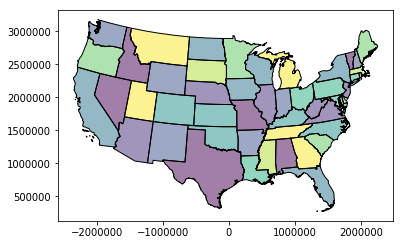

In [20]:
continental_states.plot()

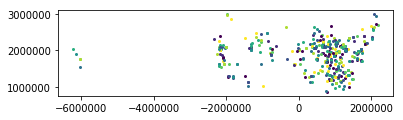

In [21]:
stations.plot()

(-6634560.1440634364,
 2681664.9541050289,
 124423.84046021957,
 3317717.6387093929)

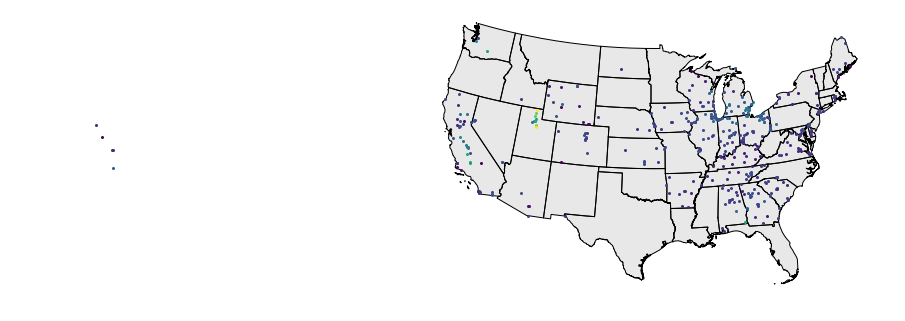

In [22]:
ax = continental_states.plot(color='lightgrey', figsize=(15,15))
stations.plot(column='1st Max Value', figsize=(15,15), ax=ax)
ax.axis('off')

### 4. Map the power plants owned by the top 5 most common energy companies as red. Map the rest of the plants as dark grey.

In [23]:
pplants = pd.read_csv('powerplants.csv')
pplants['geometry'] = pplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
pplants = gpd.GeoDataFrame(pplants)
pplants.crs = {'init':'epsg:4269'}
pplants

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889)
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,130.0,0.0,130.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128)
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,1034.0,1034.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344)
5,9,Copper,El Paso Electric Co,5701,Electric Utility,El Paso,El Paso,79915,651 Hawkins Blvd.,natural gas,62.0,0.0,62.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 62 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,31.756900,-106.375000,POINT (-106.375 31.7569)
6,10,Greene County,Alabama Power Co,195,Electric Utility,Demopolis,Greene,36732,Highway 43,natural gas,1237.0,497.0,740.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 497 MW, Natural Gas = 740 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,32.601700,-87.781100,POINT (-87.7811 32.6017)
7,11,H Neely Henry Dam,Alabama Power Co,195,Electric Utility,Ohatchee,Calhoun,36271,1021 Ala Highway 144,hydroelectric,70.0,0.0,0.0,0.0,NaN,70.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 70 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.784500,-86.052400,POINT (-86.05240000000001 33.7845)
8,12,Holt Dam,Alabama Power Co,195,Electric Utility,Tuscaloosa,Tuscaloosa,35476,12117 Power Plant Road,hydroelectric,45.0,0.0,0.0,0.0,NaN,45.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 45 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.255300,-87.449500,POINT (-87.4495 33.2553)
9,13,Jordan Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,6150Jordan Dam Lane,hydroelectric,100.0,0.0,0.0,0.0,NaN,100.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 100 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.618900,-86.254800,POINT (-86.2548 32.6189)


In [25]:
top_5 = pplants.Utility_Na.value_counts().head(5).reset_index()
top_5['color'] = 'red'
top_5

,index,Utility_Na,color
0,Pacific Gas & Electric Co,82,red
1,Erie Boulevard Hydropower LP,71,red
2,"Sustainable Power Group, LLC",63,red
3,Southern California Edison Co,62,red
4,PacifiCorp,59,red


In [26]:
pplants = pplants.merge(top_5, left_on='Utility_Na', right_on='index', how='left')
pplants.color.fillna('darkgrey', inplace=True)
pplants.head(5)

,Plant_Code,Plant_Name,Utility_Na_x,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index,Utility_Na_y,color
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),NaN,NaN,darkgrey
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),NaN,NaN,darkgrey
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889),NaN,NaN,darkgrey
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,130.0,0.0,130.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128),NaN,NaN,darkgrey
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,1034.0,1034.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344),NaN,NaN,darkgrey


In [27]:
continental_states.crs

{'init': 'epsg:5070'}

In [28]:
pplants = pplants.to_crs({'init':'epsg:5070'})
pplants.crs

{'init': 'epsg:5070'}

(-7067165.0471689412,
 11239121.234014507,
 -26142.563621147536,
 6479612.1244181013)

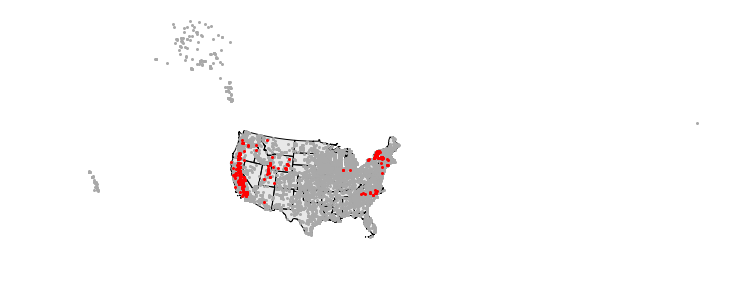

In [29]:
ax = continental_states.plot(color='lightgrey', figsize=(12,10))
pplants[pplants.color == 'darkgrey'].plot(color='darkgrey', ax=ax, figsize=(12,10))
pplants[pplants.color == 'red'].plot(color='red', ax=ax, figsize=(12,10))
ax.axis('off')

### 5.	Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

In [30]:
pplants = pd.read_csv('powerplants.csv')
pplants['geometry'] = pplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
pplants = gpd.GeoDataFrame(pplants)
pplants.crs = {'init':'epsg:4269'}
pplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [31]:
pplants.loc[pplants['PrimSource'] == 'nuclear', 'color'] = 'red'
pplants['color'].fillna('darkgrey', inplace=True)
pplants.head(3)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,color
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),darkgrey
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),darkgrey
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889),darkgrey


In [32]:
pplants = pplants.to_crs({'init':'epsg:5070'})
pplants.crs

{'init': 'epsg:5070'}

(-7067165.0471689412,
 11239121.234014507,
 -26142.563621147536,
 6479612.1244181013)

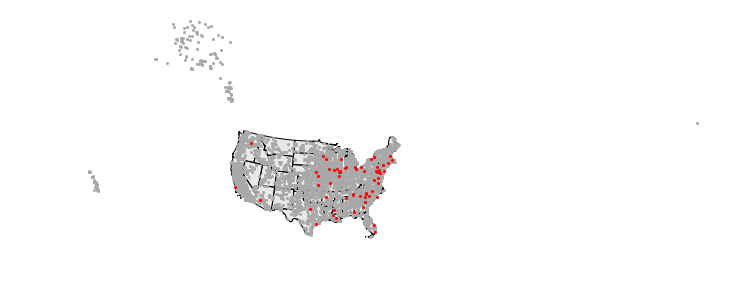

In [33]:
ax = continental_states.plot(color='lightgrey', figsize=(12,10))
pplants[pplants.color == 'darkgrey'].plot(color='darkgrey', ax=ax, figsize=(12,10))
pplants[pplants.color == 'red'].plot(color='red', ax=ax, figsize=(12,10))
ax.axis('off')

### 6.	Map power plants that produce energy through both natural gas and oil.

In [34]:
pplants = pd.read_csv('powerplants.csv')
pplants['geometry'] = pplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
pplants = gpd.GeoDataFrame(pplants)
pplants.crs = {'init':'epsg:4269'}
pplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [35]:
# Regex from: https://stackoverflow.com/questions/37011734/pandas-dataframe-str-contains-and-operation
pplants_both = pplants[pplants.source_des.str.contains(r'^(?=.*Petroleum)(?=.*Natural)')]
pplants_both.head(5)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
18,26,E C Gaston,Alabama Power Co,195,Electric Utility,Wilsonville,Shelby,35186,31972 Highway 25 North,coal,1878.0,1606.0,256.0,16.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1606 MW, Natural Gas = 256 MW, Petroleu...",Conventional Steam Coal; Natural Gas Steam Tur...,"EIA-860, EIA-860M and EIA-923",201607,33.244211,-86.458056,POINT (-86.458056 33.244211)
42,75,Anchorage 1,Anchorage Municipal Light and Power,599,Electric Utility,Anchorage,Anchorage,99501,821 E. 1st Ave,natural gas,90.4,0.0,88.4,2.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Natural Gas = 88.4 MW, Petroleum = 2 MW",Natural Gas Fired Combustion Turbine; Petroleu...,"EIA-860, EIA-860M and EIA-923",201607,61.222100,-149.866100,POINT (-149.8661 61.2221)
66,120,Yucca,Arizona Public Service Co,803,Electric Utility,Yuma,Yuma,85364,7522 South Somerton Ave.,natural gas,328.0,0.0,257.0,71.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Natural Gas = 257 MW, Petroleum = 71 MW",Natural Gas Fired Combustion Turbine; Natural ...,"EIA-860, EIA-860M and EIA-923",201607,32.721400,-114.710600,POINT (-114.7106 32.7214)
79,151,McClure,Modesto Irrigation District,12745,Electric Utility,Modesto,Stanislaus,95354,639 S. McClure Rd.,natural gas,112.0,0.0,56.0,56.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Natural Gas = 56 MW, Petroleum = 56 MW",Natural Gas Fired Combustion Turbine; Petroleu...,"EIA-860, EIA-860M and EIA-923",201607,37.629360,-120.931390,POINT (-120.93139 37.62936)
321,508,Lamar Plant,City of Lamar - (CO),10633,Electric Utility,Lamar,Prowers,81052,100 North Second Street,coal,51.7,40.0,4.2,2.0,NaN,0.0,0.0,0.0,0.0,5.5,NaN,NaN,"Coal = 40 MW, Natural Gas = 4.2 MW, Petroleum ...",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,38.033327,-102.537915,POINT (-102.537915 38.033327)


In [36]:
states.crs

{'init': 'epsg:4269'}

In [37]:
continental_states.crs

{'init': 'epsg:5070'}

In [38]:
states = states.to_crs({'init': 'epsg:5070'})
states.crs

{'init': 'epsg:5070'}

In [39]:
pplants.crs

{'init': 'epsg:4269'}

In [40]:
pplants = pplants.to_crs({'init': 'epsg:5070'})
pplants.crs

{'init': 'epsg:5070'}

In [41]:
pplants_both.crs

{'init': 'epsg:4269'}

In [42]:
pplants_both = pplants_both.to_crs({'init': 'epsg:5070'})
pplants_both.crs

{'init': 'epsg:5070'}

(-11120816.667060906,
 4099727.3197950181,
 -419434.65197277057,
 7088541.6469820887)

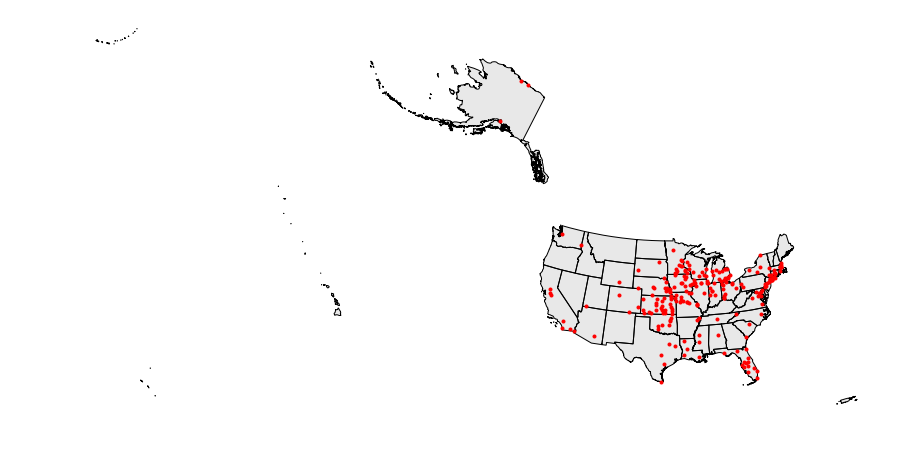

In [43]:
ax = states.plot(color='lightgrey', figsize=(15,12))
pplants_both.plot(color='red', ax=ax, figsize=(15,12), markersize=3)
ax.axis('off')